In [1]:
from figures_handler import method_colors as method_colors
from figures_handler import method_names as method_names
from figures_handler import colors as colors
import matplotlib.patches as mpatches
from pandas.plotting import table
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import figures_handler as fh
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import json
import os

In [2]:
# get the project root
dir_path = os.path.abspath('')
project_root = os.path.abspath(os.path.join(dir_path, os.pardir))

experiment_directory = os.path.join(project_root, 'experiments_settings', "experiments_meta_helpers.csv")
data_folder, results_directory, matches_directory, libraries, library_names = fh.get_basic_data(project_root)

display(libraries[['Library', 'short_name']])

,Library,short_name
0,GNPS-MSMLS,lib1
1,GNPS-NIH-NATURALPRODUCTSLIBRARY_ROUND2_POSITIVE,lib2
2,GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE,lib3
3,BERKELEY-LAB,lib4


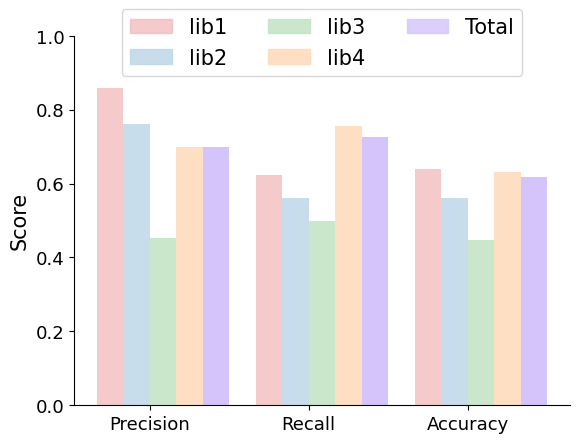

In [3]:
path = os.path.join(results_directory, "modification_count", 'results.json')
res = json.load(open(path))

fig, ax = plt.subplots()
x_axis_groups = ['precision', 'recall', 'accuracy']

width = 1 / (len(libraries) + 2)
legend = []

cases = ['false_positives', 'false_negatives', 'true_positives', 'true_negatives']
total = {case: 0 for case in cases}

for index, row in libraries.iterrows():
    library = row['Library']
    short_name = row['short_name']

    # draw the bars
    for i, x_axis_group in enumerate(x_axis_groups):
        x = i + index * width
        y = res[library][x_axis_group]
        ax.bar(x, y, color=colors[index], width=width, alpha=0.8)
    
    for case in cases:
        total[case] += res[library][case]
    
    
    # add the legend
    legend.append(mpatches.Patch(color=colors[index], label=short_name, alpha=0.8))

total['precision'] = total['true_positives'] / (total['true_positives'] + total['false_positives'])
total['recall'] = total['true_positives'] / (total['true_positives'] + total['false_negatives'])
total['accuracy'] = (total['true_positives'] + total['true_negatives']) / sum(total.values())

for i, x_axis_group in enumerate(x_axis_groups):
    x = i + len(libraries) * width
    y = total[x_axis_group]
    ax.bar(x, y, color= colors[len(libraries)], width=width)

legend.append(mpatches.Patch(color=colors[len(libraries)], label='Total', alpha=0.8))


ax.set_ylim(0, 1)
ax.set_xticks(np.arange(len(x_axis_groups)) + len(x_axis_groups)/2 * width)
x_axis_groups = [group.capitalize() for group in x_axis_groups]
ax.set_xticklabels(x_axis_groups, fontsize=15)
ax.set_ylabel('Score', fontsize=15)
# update the font size
ax.tick_params(axis='both', which='major', labelsize=13)

# add the legend
ax.legend(handles=legend, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=15)

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [5]:
print(total)

{'false_positives': 2364, 'false_negatives': 2052, 'true_positives': 5450, 'true_negatives': 1724, 'precision': 0.6974660865113899, 'recall': 0.7264729405491869, 'accuracy': 0.61890584260713}
